##### Copyright 2019 The TensorFlow Authors.

# Convolutional Neural Network (CNN)

In [12]:
import cv2
import numpy as np
import pandas as pd 
import json
import glob
import os
from PIL import Image
import scipy

In [13]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, optimizers
import matplotlib.pyplot as plt
from sklearn.model_selection import LeaveOneOut,KFold
import tensorflow_hub as hub


In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from sklearn.model_selection import cross_val_score


In [15]:
# import images
#change user
path = "C:\\Users\\mkingsl6\\Desktop\\clean_data"
# path ='C:\\Users\\amart50\\Desktop\\CNN_test\\data'
deadlift = path + "\\Deadlift"
bench = path + "\\Bench"
squats = path + "\\Squat"

In [16]:
# normalise the pixel values
train_ = ImageDataGenerator(validation_split = .2, rescale=1./255)
TRAIN_DIR = path


train_dataset = train_.flow_from_directory(
    TRAIN_DIR,
    target_size = (224, 224),
    subset='training',
    batch_size = 10,
    class_mode='categorical'
)

validation_dataset = train_.flow_from_directory(
    TRAIN_DIR,
    target_size = (224, 224),
    subset='validation',
    class_mode='categorical',
    batch_size = 10,
)



Found 248 images belonging to 3 classes.
Found 62 images belonging to 3 classes.


In [17]:
# train_dataset.shape
mobilenet_v2 = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"
feature_extractor_model = mobilenet_v2
feature_extractor_layer = hub.KerasLayer(
    feature_extractor_model,
    input_shape=(224, 224, 3),
    trainable=False)


In [18]:
num_classes = 3

model = tf.keras.models.Sequential([
#   tf.keras.layers.Rescaling(1./255),
feature_extractor_layer,
# tf.keras.layers.Conv2D(16, (3,3), input_shape=(256,256,3), activation='relu'),
# tf.keras.layers.MaxPooling2D(2,2),

# tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
# tf.keras.layers.MaxPooling2D(2,2),

# tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
# tf.keras.layers.MaxPooling2D(2,2),

# tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
# tf.keras.layers.MaxPooling2D(2,2),

# tf.keras.layers.Flatten(),
# tf.keras.layers.Dense(128*4, activation='relu'),
tf.keras.layers.Dense(num_classes, activation='softmax')
])

In [19]:
# source: https://stackoverflow.com/questions/57301698/how-to-change-a-learning-rate-for-adam-in-tf2
# to reduce lr each run
# model.fit(x_train, y_train, callbacks=[LearningRateReducerCb()], epochs=5)
class LearningRateReducerCb(tf.keras.callbacks.Callback):

  def on_epoch_end(self, epoch, logs={}):
    old_lr = self.model.optimizer.lr.read_value()
    new_lr = old_lr * 0.1
    print("\nEpoch: {}. Reducing Learning Rate from {} to {}".format(epoch, old_lr, new_lr))
    self.model.optimizer.lr.assign(new_lr)

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

In [20]:
adam = tf.keras.optimizers.Adam(
   learning_rate = 0.1, beta_1 = 0.9, beta_2 = 0.999, amsgrad = False
)
nadam = tf.keras.optimizers.Nadam(learning_rate = 0.002, beta_1 = 0.9, beta_2 = 0.999)
sgd = tf.keras.optimizers.SGD(learning_rate = 0.01, momentum = 0.8, nesterov = False)

optimizers = [adam, nadam, sgd]

In [ ]:
for opt in optimizers:
    model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
    epochs=30
    history = model.fit(
    train_dataset,
    validation_data=validation_dataset,
    epochs=epochs,
    callbacks=[early_stopping]
    )
    print( model.evaluate(validation_dataset) )

    model_save = "clean_data"+ str(opt)+ ".hdf5"
    tf.keras.models.save_model(model, model_save)
    
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylim([0,1.1])
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.savefig("clean"+str(opt)+".jpg", dpi = 200)
    plt.show()

# Older

In [21]:
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

In [110]:
# # model_fit = model.fit(train_dataset, epochs=5)
# model.summary()


In [22]:
epochs=3
history = model.fit(
  train_dataset,
  validation_data=validation_dataset,
  epochs=epochs,
  callbacks=[early_stopping]
)

Epoch 1/3
25/25 [==============================] - 9s 189ms/step - loss: 9.5435 - accuracy: 0.5847 - val_loss: 5.0430 - val_accuracy: 0.6935
Epoch 2/3
25/25 [==============================] - 4s 144ms/step - loss: 2.0935 - accuracy: 0.9032 - val_loss: 0.5442 - val_accuracy: 0.9194
Epoch 3/3
25/25 [==============================] - 4s 142ms/step - loss: 0.2533 - accuracy: 0.9758 - val_loss: 0.8965 - val_accuracy: 0.9032


In [27]:
# model.fit(x_train, y_train, callbacks=[LearningRateReducerCb()], epochs=5)
predictions = model.predict(validation_dataset)



7/7 [==============================] - 1s 120ms/step


In [36]:
validation_dataset.class_indices.keys()
validation_dataset.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [38]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


In [ ]:
predi

In [41]:
cm = confusion_matrix(validation_dataset.classes, predictions)

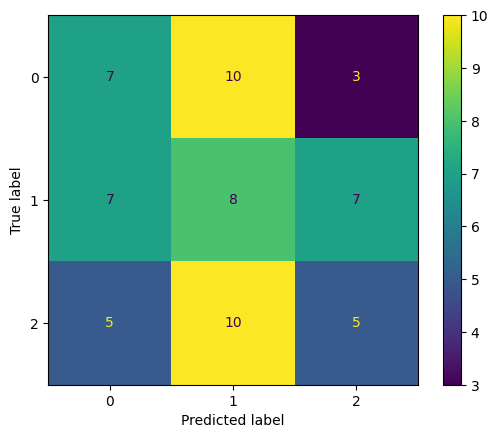

In [42]:
disp = ConfusionMatrixDisplay(cm)
disp.plot()

In [40]:
predictions = [np.argmax( predictions[i]) for i in range(len(predictions)) ]

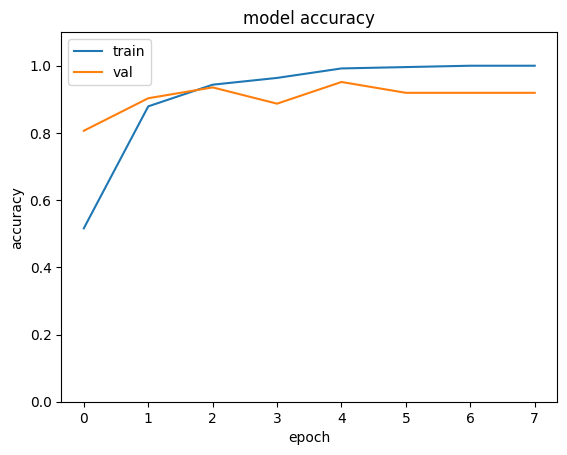

In [113]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
# plt.scale()
plt.ylim([0,1.1])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.savefig("clean_")
plt.show()

In [74]:
tf.keras.models.save_model(model,'my_model_adam_clean.hdf5')

In [75]:
custom_path = "C:\\Users\\mkingsl6\\Desktop\\verfication_data_mike"
bench_test = custom_path + "\\Bench"
deadlift_test = custom_path + "\\Deadlift"
squats_test = custom_path + "\\Squat"

In [168]:
import glob
# bench_testlist = glob.glob(bench_test)
bench_testlist=os.listdir(bench_test)

# deadlift_testlist = glob.glob(deadlift_test)
deadlift_testlist=os.listdir(deadlift_test)

# squats_test = glob.glob(squats_test)
squats_testlist=os.listdir(squats_test)

data = []
labels = []

for i in bench_testlist:
    # print(i)
    i = bench_test + "\\"+ i
    # print(i)
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
    target_size= (224,224))
    image=np.array(image)
    data.append(image)
    labels.append(0)

for i in deadlift_testlist:
    # print(i)
    i = deadlift_test + "\\"+ i 
    # print(i)
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
    target_size= (224,224))
    image=np.array(image)
    data.append(image)
    labels.append(1)
for i in squats_testlist:
    i = squats_test + "\\"+ i 
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
    target_size= (224,224))
    image=np.array(image)
    data.append(image)
    labels.append(2)

data = np.array(data)
labels = np.array(labels)

In [162]:
import glob
# bench_testlist = glob.glob(bench_test)
bench_testlist=os.listdir(bench_test)

# deadlift_testlist = glob.glob(deadlift_test)
deadlift_testlist=os.listdir(deadlift_test)

# squats_test = glob.glob(squats_test)
squats_testlist=os.listdir(squats_test)

data = []
labels = []

for i in bench_testlist:
    # print(i)
    i = bench_test + "\\"+ i
    # print(i)
    image = cv2.imread(img)
    image = tf.image.resize(image, (224, 224))  # Resize the image
    image = tf.keras.applications.mobilenet_v2.preprocess_input(image)  # Pre-process the image for the model
    image = image[None, ...]  # Add a batch dimension to the image
   # image=np.array(image)

    data.append(image)
    labels.append(0)

for i in deadlift_testlist:
    # print(i)
    i = deadlift_test + "\\"+ i 
    # print(i)
    image = cv2.imread(img)
    image = tf.image.resize(image, (224, 224))  # Resize the image
    image = tf.keras.applications.mobilenet_v2.preprocess_input(image)  # Pre-process the image for the model
    image = image[None, ...]  # Add a batch dimension to the image
    labels.append(1)
for i in squats_testlist:
    i = squats_test + "\\"+ i 
    image = cv2.imread(img)
    image = tf.image.resize(image, (224, 224))  # Resize the image
    image = tf.keras.applications.mobilenet_v2.preprocess_input(image)  # Pre-process the image for the model
    image = image[None, ...]  # Add a batch dimension to the image
    data.append(image)
    labels.append(2)

data = np.array(data)
labels = np.array(labels)

In [169]:
class_names = ["Bench", "Deadlift", "Squats"]

In [170]:
# # normalise the pixel values
# train_ = ImageDataGenerator(validation_split = .99, rescale=1./255)
# TRAIN_DIR = path

# test_custom_dataset = train_.flow_from_directory(
#     TRAIN_DIR,
#     target_size = (224, 224),
#     subset='validation',
#     class_mode='categorical',
#     batch_size = 10,
# )



In [171]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [172]:
labels
# data

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2])

In [174]:
predictions

array([[6.2385112e-07, 9.9999940e-01, 8.4618638e-31],
       [9.9960929e-01, 3.9068970e-04, 5.5983714e-29],
       [4.5533266e-04, 9.9954468e-01, 1.8653516e-38],
       [1.0000000e+00, 7.6034151e-10, 2.5124331e-33],
       [5.9269237e-06, 9.9999404e-01, 2.2983012e-30],
       [9.5259535e-01, 4.7404680e-02, 1.0225013e-21],
       [2.3377927e-02, 9.7662205e-01, 4.4437064e-30],
       [2.4392008e-22, 1.0000000e+00, 0.0000000e+00],
       [4.4200887e-16, 1.0000000e+00, 0.0000000e+00],
       [4.5631007e-21, 1.0000000e+00, 0.0000000e+00],
       [4.8794770e-21, 1.0000000e+00, 0.0000000e+00],
       [8.6568727e-04, 9.9913436e-01, 5.7055109e-29],
       [6.7173052e-01, 3.2826945e-01, 3.3486959e-21],
       [6.1983594e-13, 1.0000000e+00, 1.0200158e-36],
       [4.7230735e-15, 1.0000000e+00, 4.4391268e-26],
       [1.8345077e-06, 9.9999821e-01, 7.0319569e-21],
       [1.0304136e-06, 9.9999893e-01, 1.3524712e-20]], dtype=float32)

In [177]:
predictions = model.predict(data)
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# cm = confusion_matrix(labels, predictions, labels=class_names)
# cm

ValueError: Unexpected result of `predict_function` (Empty batch_outputs). Please use `Model.compile(..., run_eagerly=True)`, or `tf.config.run_functions_eagerly(True)` for more information of where went wrong, or file a issue/bug to `tf.keras`.

In [199]:
img = deadlift_test + "\\" + deadlift_testlist[0]
img

'C:\\Users\\mkingsl6\\Desktop\\verfication_data_mike\\Deadlift\\1.jpg'

In [179]:
image = cv2.imread(img)
image = tf.image.resize(image, (224, 224))  # Resize the image
image = tf.keras.applications.mobilenet_v2.preprocess_input(image)  # Pre-process the image for the model
image = image[None, ...]  # Add a batch dimension to the image

# Use the model to classify the image
predictions = model.predict(image)

1/1 [==============================] - 0s 29ms/step


In [180]:
predictions

array([[1.0487490e-03, 9.9895120e-01, 1.4753183e-30]], dtype=float32)

In [62]:
tf.nn.softmax(predictions)[0, tf.argmax(predictions[0])]

<tf.Tensor: shape=(), dtype=float32, numpy=0.54265463>

In [68]:
f = tf.argmax([1,2], axis = 0)
f

<tf.Tensor: shape=(), dtype=int64, numpy=1>

In [ ]:
custom_dataset = train_.flow_from_directory(
    TRAIN_DIR,
    target_size = (224, 224),
    subset='validation',
    class_mode='categorical',
    batch_size = 10,
)

# Brute force way 

In [181]:
import glob
# bench_testlist = glob.glob(bench_test)
bench_testlist=os.listdir(bench_test)
predictions = []
# deadlift_testlist = glob.glob(deadlift_test)
deadlift_testlist=os.listdir(deadlift_test)

# squats_test = glob.glob(squats_test)
squats_testlist=os.listdir(squats_test)

data = []
labels = []

for i in bench_testlist:
    i = bench_test + "\\"+ i
    image = cv2.imread(i)
    image = tf.image.resize(image, (224, 224))  # Resize the image
    image = tf.keras.applications.mobilenet_v2.preprocess_input(image)  # Pre-process the image for the model
    image = image[None, ...]  # Add a batch dimension to the image
    # data.append(image)
    predictions.append(model.predict(image))
    labels.append(0)

for i in deadlift_testlist:
    # print(i)
    i = deadlift_test + "\\"+ i 
    # print(i)
    image = cv2.imread(i)
    image = tf.image.resize(image, (224, 224))  # Resize the image
    image = tf.keras.applications.mobilenet_v2.preprocess_input(image)  # Pre-process the image for the model
    image = image[None, ...]  # Add a batch dimension to the image
    # data.append(image)
    predictions.append(model.predict(image))
    labels.append(1)

for i in squats_testlist:
    i = squats_test + "\\"+ i 
    image = cv2.imread(i)
    image = tf.image.resize(image, (224, 224))  # Resize the image
    image = tf.keras.applications.mobilenet_v2.preprocess_input(image)  # Pre-process the image for the model
    image = image[None, ...]  # Add a batch dimension to the image
    # data.append(image)
    predictions.append(model.predict(image))
    labels.append(2)

data = np.array(data)
labels = np.array(labels)
predictions = np.array(predictions)

1/1 [==============================] - 0s 28ms/step


In [198]:
[np.argmax( predictions[i]) for i in range(len(predictions)) ]

[0, 2, 0, 2, 2, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1]

In [200]:
labels

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2])